<a href="https://colab.research.google.com/github/mehak2605/BookRecommendationModel/blob/main/Book_Recommendation_Model_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       #statistical graphics and performing data analytics

In [ ]:
book = pd.read_csv('/content/Goodreads_books_with_genres.csv')
b=book.copy()

In [ ]:
b = b.apply(lambda x: x.str.upper() if x.dtype == 'object' else x)      #lambda - an anonymous function in which we can pass instantly without defining functions traditionally

In [ ]:
b.head()

In [ ]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Book Id             11127 non-null  int64  
 1   Title               11127 non-null  object 
 2   Author              11127 non-null  object 
 3   average_rating      11127 non-null  float64
 4   isbn                11127 non-null  object 
 5   isbn13              11127 non-null  int64  
 6   language_code       11127 non-null  object 
 7   num_pages           11127 non-null  int64  
 8   ratings_count       11127 non-null  int64  
 9   text_reviews_count  11127 non-null  int64  
 10  publication_date    11127 non-null  object 
 11  publisher           11127 non-null  object 
 12  genres              11030 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


In [ ]:
b.describe()

,Book Id,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [ ]:
b.isnull().sum()

,0
Book Id,0
Title,0
Author,0
average_rating,0
isbn,0
isbn13,0
language_code,0
num_pages,0
ratings_count,0
text_reviews_count,0


In [ ]:
b.dropna(subset=['genres'], inplace=True)     #removes rows with missing values

In [ ]:
b = b[b['num_pages'] != 0]
b = b[b['ratings_count'] != 0]

In [ ]:
unique_ids = len(b['Book Id'].unique())
print(unique_ids)
unique_isbn = len(b['isbn'].unique())
print(unique_ids)

10899
10899


In [ ]:
unique_isbn13 = len(b['isbn13'].unique())
print(unique_ids)

10899


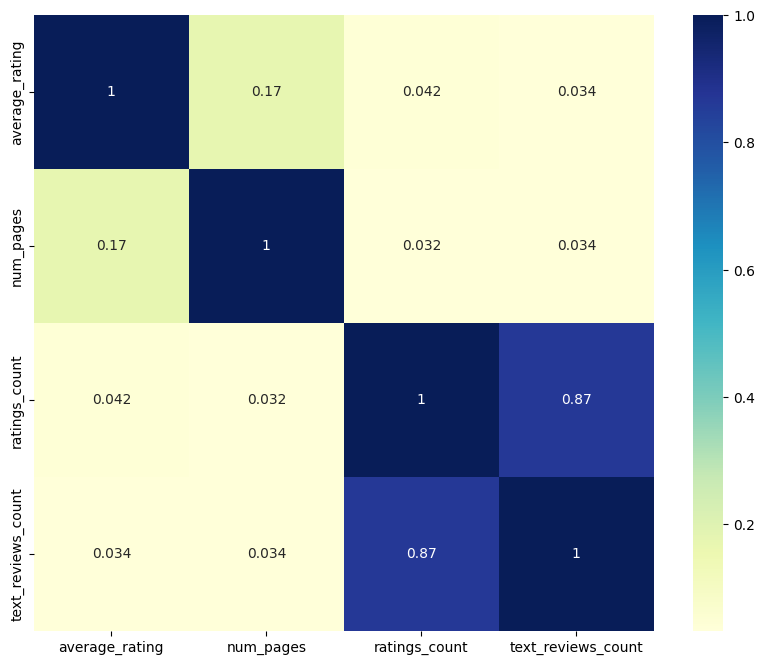

In [ ]:
selected_cols = b[['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']]

# Calculate the correlation
correlation = selected_cols.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='YlGnBu')       #heatmaps show some kind of relation between the value and the dataframe
#the value shows any patterns in value for one or both variables

plt.show()

<ipython-input-16-4cb5db301002>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occurence, y=occurence.index, palette=bar_colors)


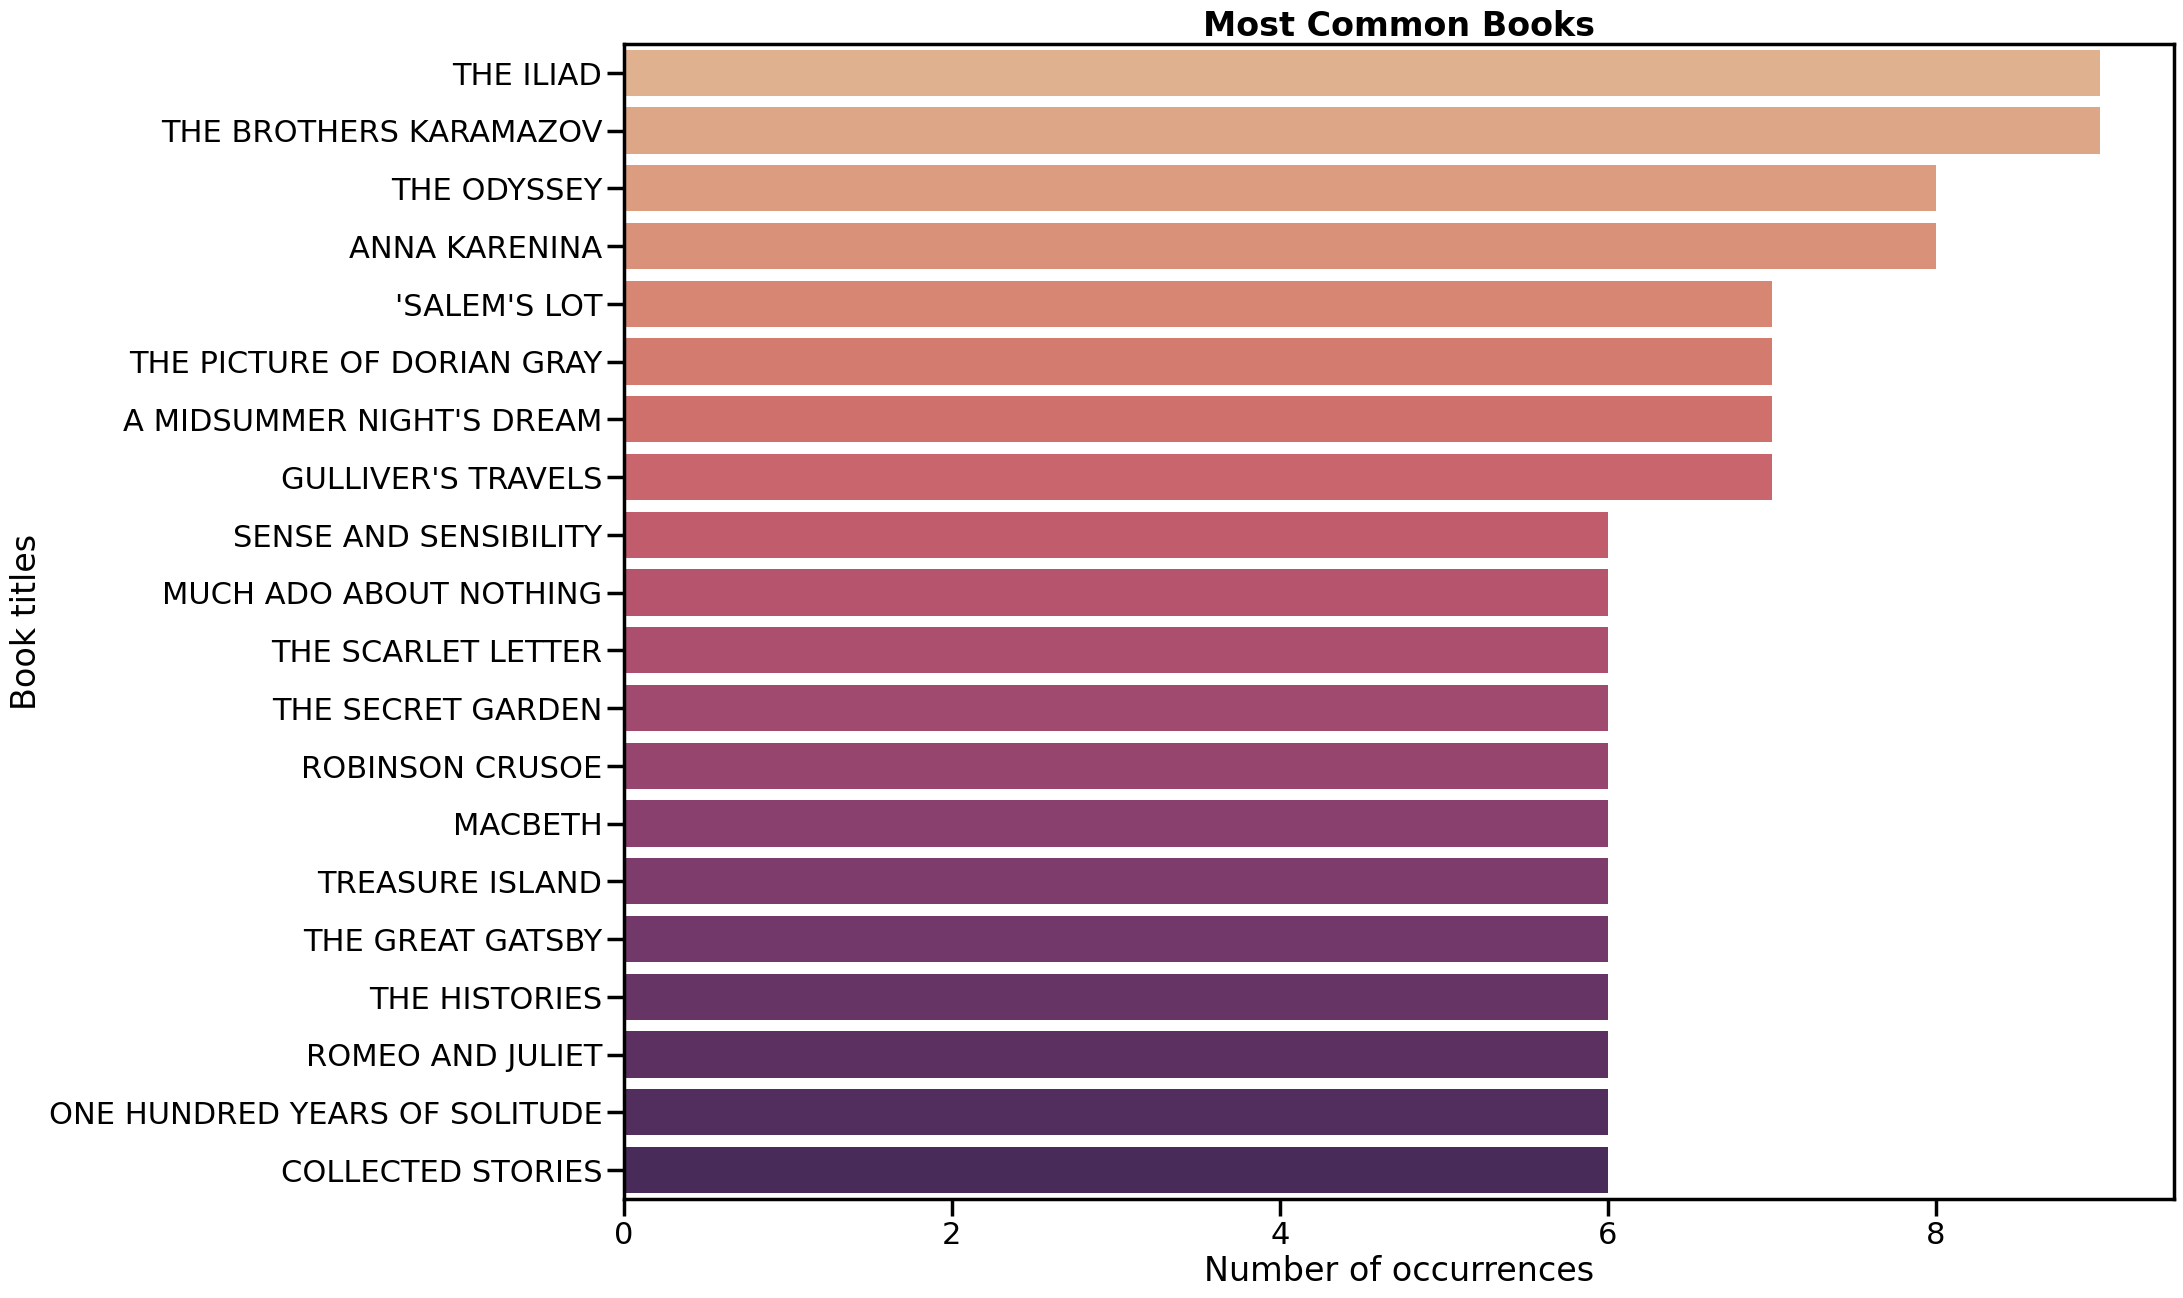

In [ ]:
sns.set_context('poster')
plt.figure(figsize=(20, 15))

occurence = b['Title'].value_counts()[:20]

# Create a colormap that maps each unique count number to a color
cmap = plt.get_cmap('flare')
colors = cmap(np.linspace(0, 1, len(occurence)))

# Create a dictionary that maps each unique count number to a color
color_dict = dict(zip(occurence.index, colors))

# Create a list of colors based on the 'Title' values, with a default color
default_color = 'gray'
bar_colors = [color_dict.get(title, default_color) for title in occurence.index]

# Use barplot with 'Title' as the hue
sns.barplot(x=occurence, y=occurence.index, palette=bar_colors)

plt.title("Most Common Books", fontweight='bold')
plt.xlabel("Number of occurrences")
plt.ylabel("Book titles")
plt.show()

Text(0, 0.5, 'Rate amount')

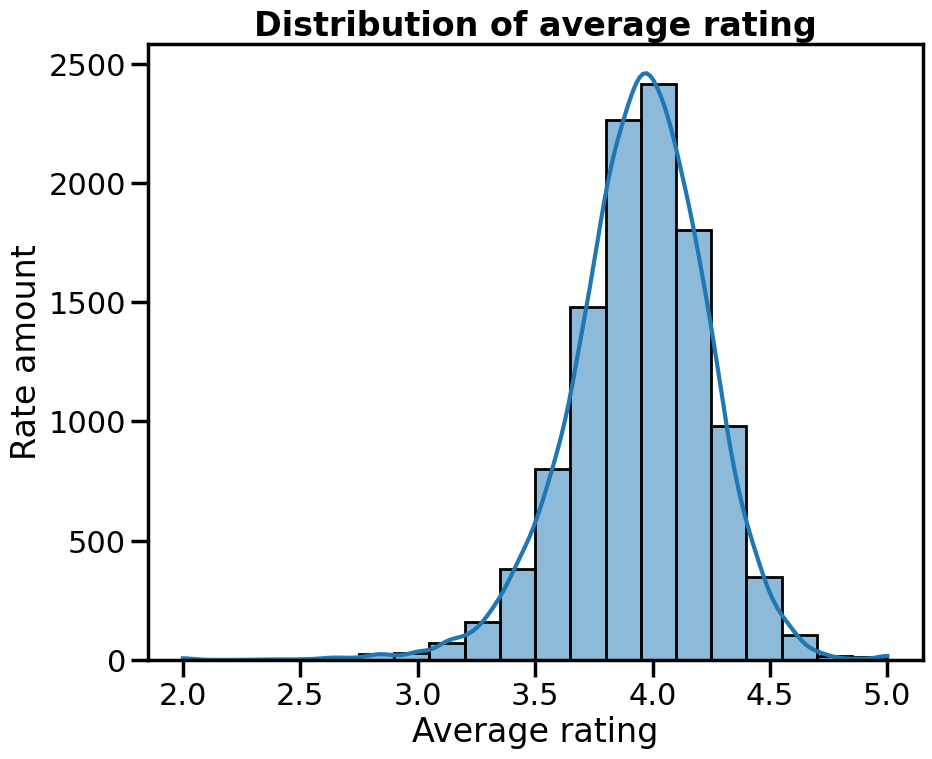

In [ ]:
plt.figure(figsize=(10,8))
rating= b.average_rating.astype(float)
sns.histplot(rating, bins=20, kde= True)
plt.title('Distribution of average rating', fontweight='bold')
plt.xlabel("Average rating")
plt.ylabel("Rate amount")

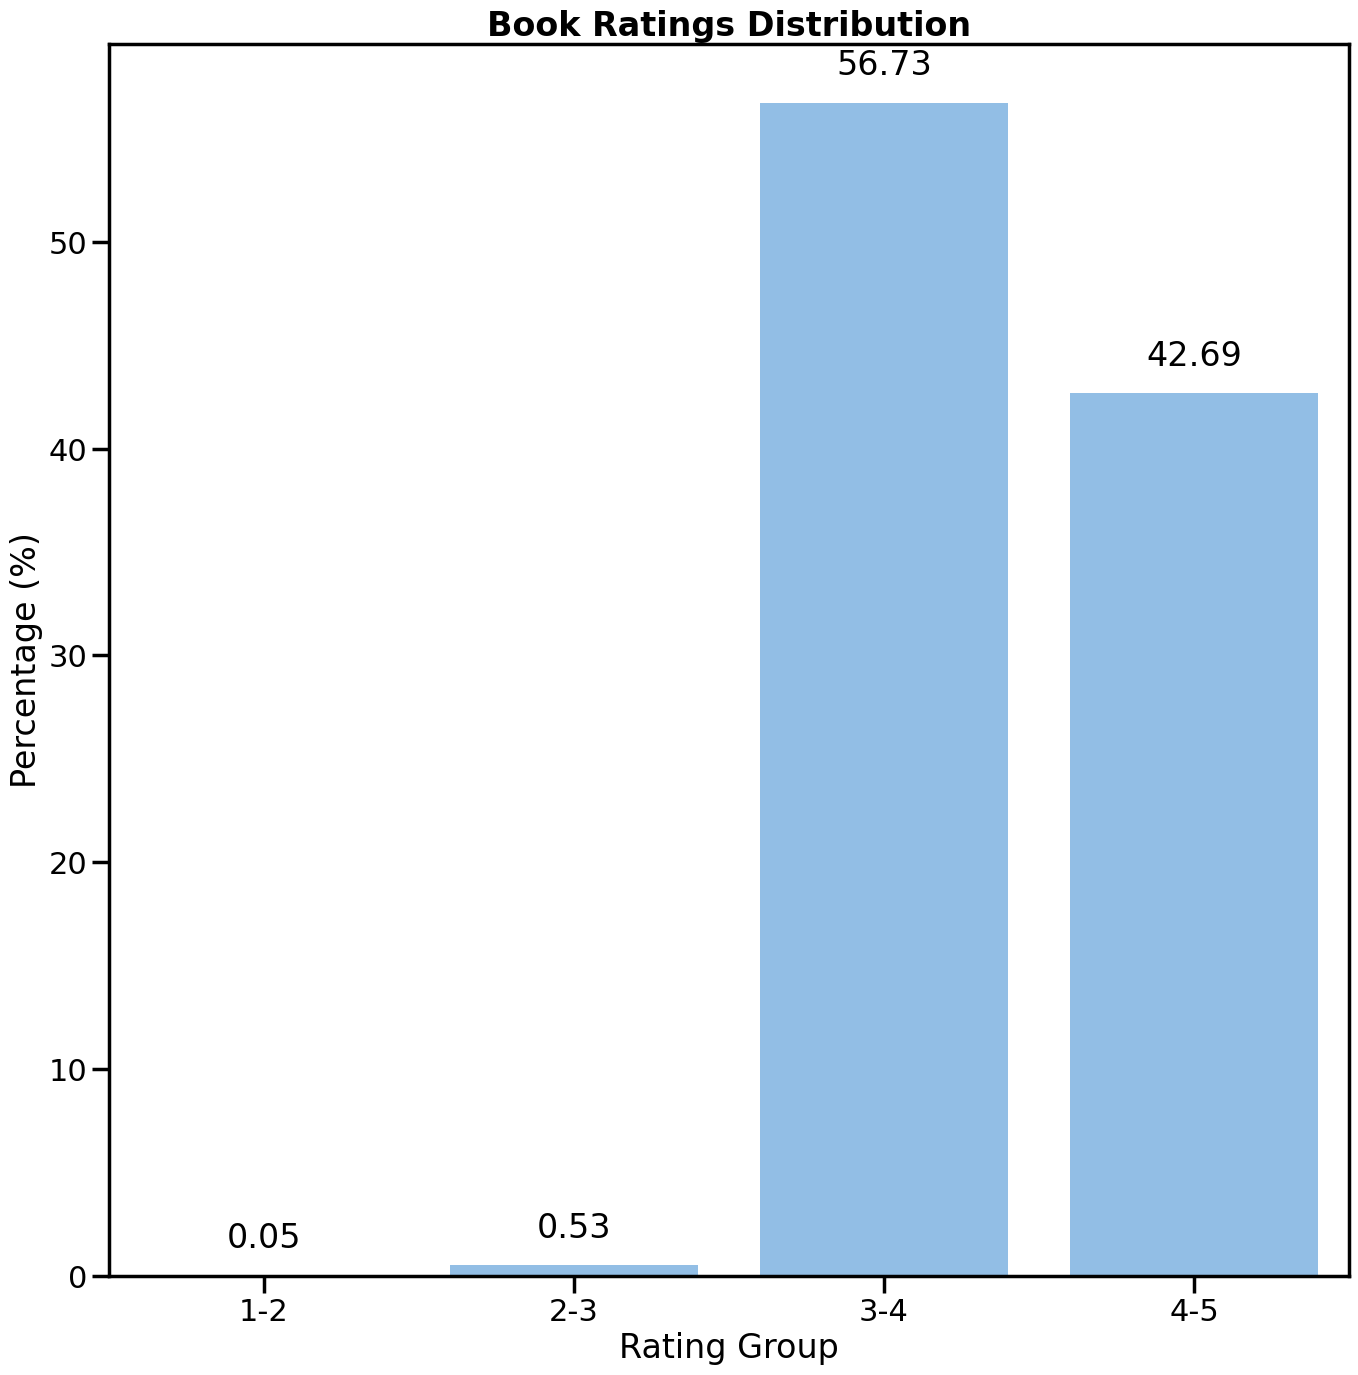

In [ ]:
# Group rating
b['rating_group'] = pd.cut(b['average_rating'], bins=[1, 2, 3, 4, 5], include_lowest=True, labels=['1-2', '2-3', '3-4', '4-5'])

# Count the values
rating_counts = b['rating_group'].value_counts().sort_index()

# Calculate percentages
rating_percentages = rating_counts / rating_counts.sum() * 100

sns.set_context('poster')

# Plotting the bar chart
plt.figure(figsize=(16, 16))  # Adjusting figure size
bars = sns.barplot(x=rating_percentages.index, y=rating_percentages.values, color='#84bff3')

# Adding percentage labels with 2 decimal places
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}', ha='center', va='bottom')  # Adjusting decimal places

plt.title('Book Ratings Distribution', fontweight='bold')
plt.xlabel('Rating Group')
plt.ylabel('Percentage (%)')
plt.show()

In [ ]:
C = b['average_rating'].mean()
m = b['ratings_count'].quantile(0.70)

def weighted_rating(x, m=m, C=C):
    v = x['ratings_count']
    R = x['average_rating']
    return (v/(v+m) * R) + (m/(v+m) * C)

b['weighted_rating'] = b.apply(weighted_rating, axis=1)

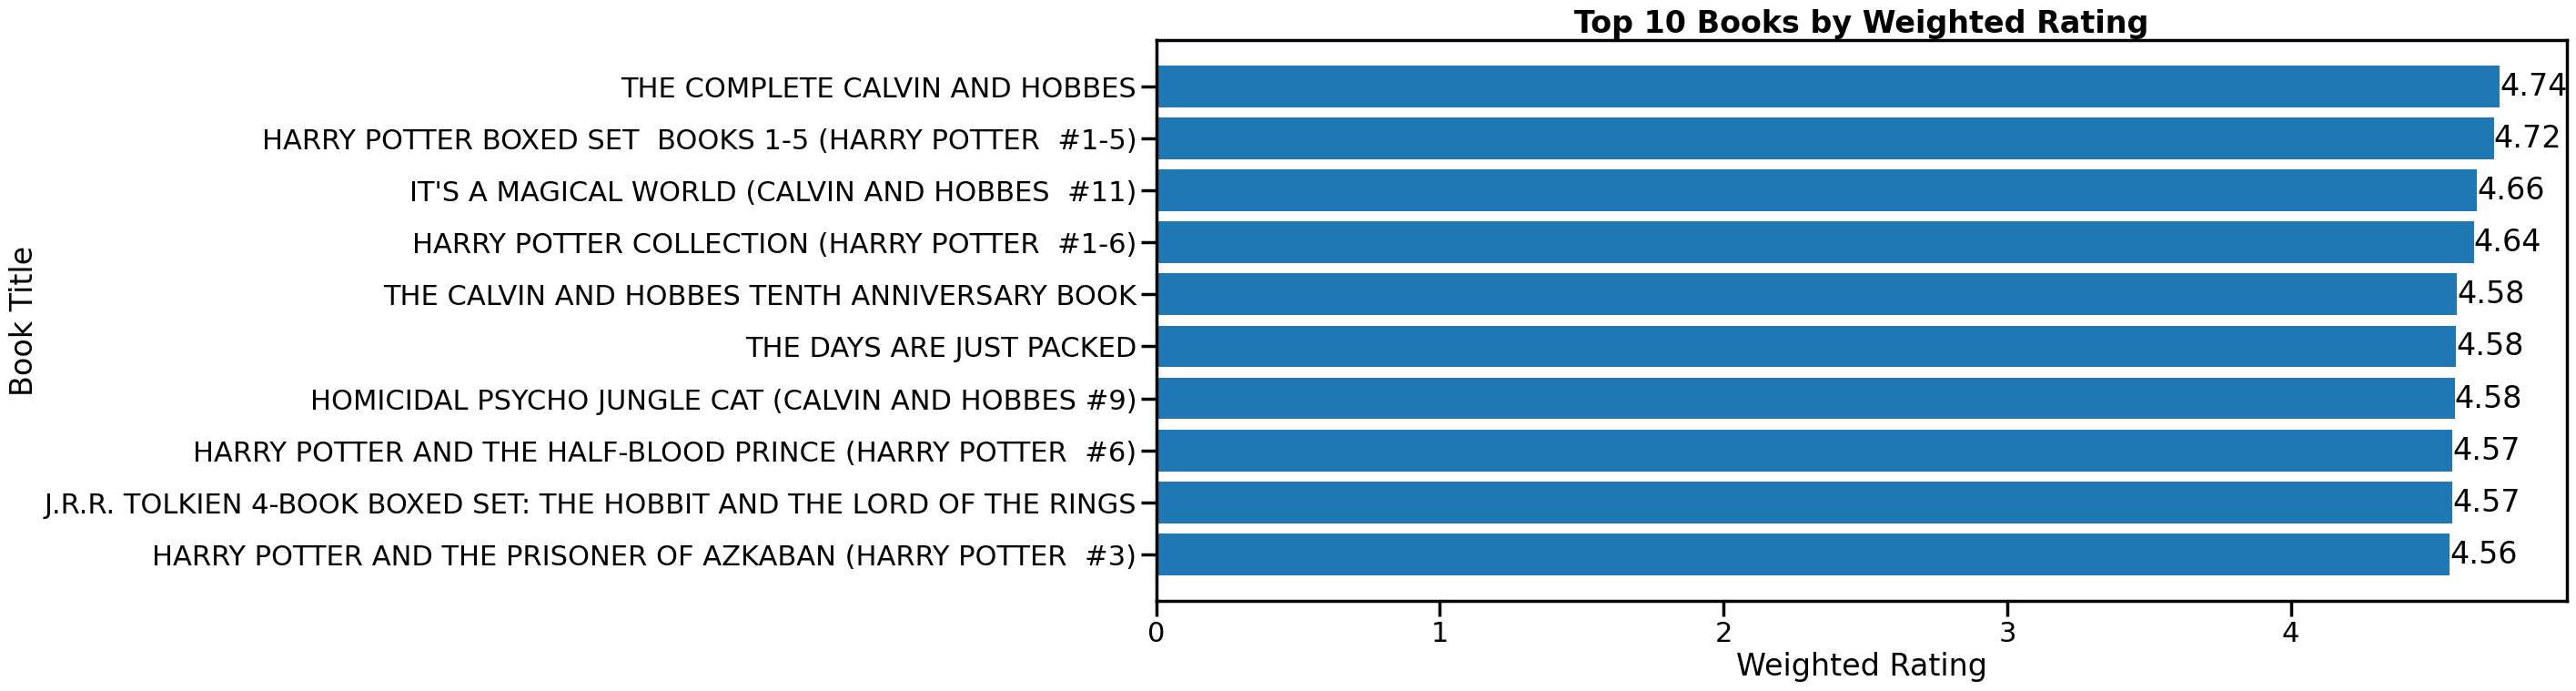

In [ ]:
# Sort books based on weighted_rating
top_books = b.sort_values('weighted_rating', ascending=False).head(10)

# Plotting the bar chart
plt.figure(figsize=(20,8))
bars = plt.barh(top_books['Title'], top_books['weighted_rating'])

# Adding rating labels with 2 decimal places
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, f'{xval:.2f}', va='center')

plt.title('Top 10 Books by Weighted Rating', fontweight='bold')
plt.xlabel('Weighted Rating')
plt.ylabel('Book Title')
plt.gca().invert_yaxis()
plt.show()

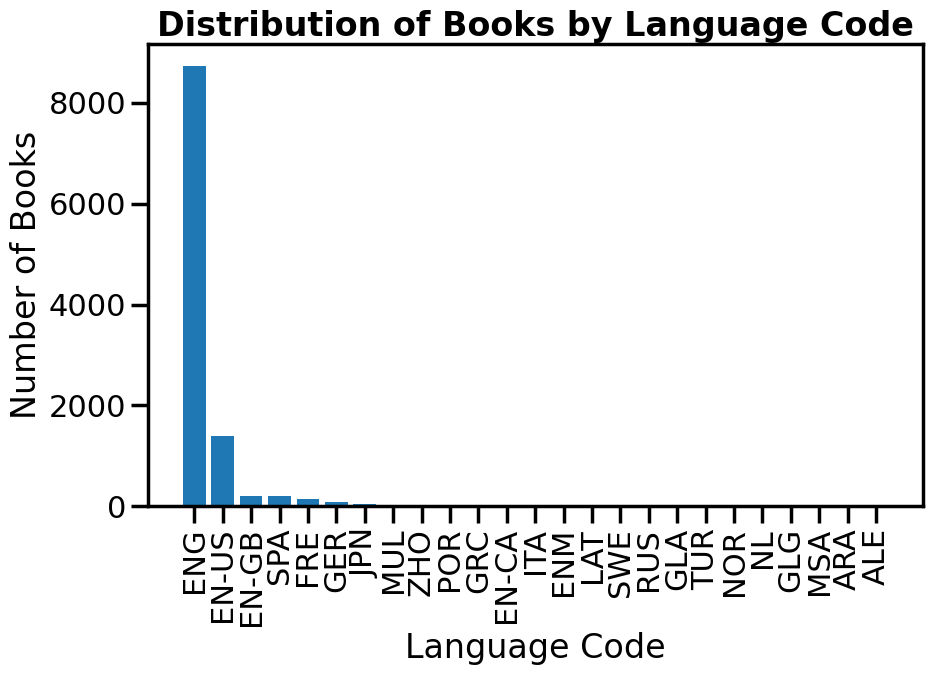

In [ ]:
# Count the number of books in each language category
language_counts = b['language_code'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(language_counts.index, language_counts)
plt.xlabel('Language Code')
plt.ylabel('Number of Books')
plt.title('Distribution of Books by Language Code', fontweight='bold')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

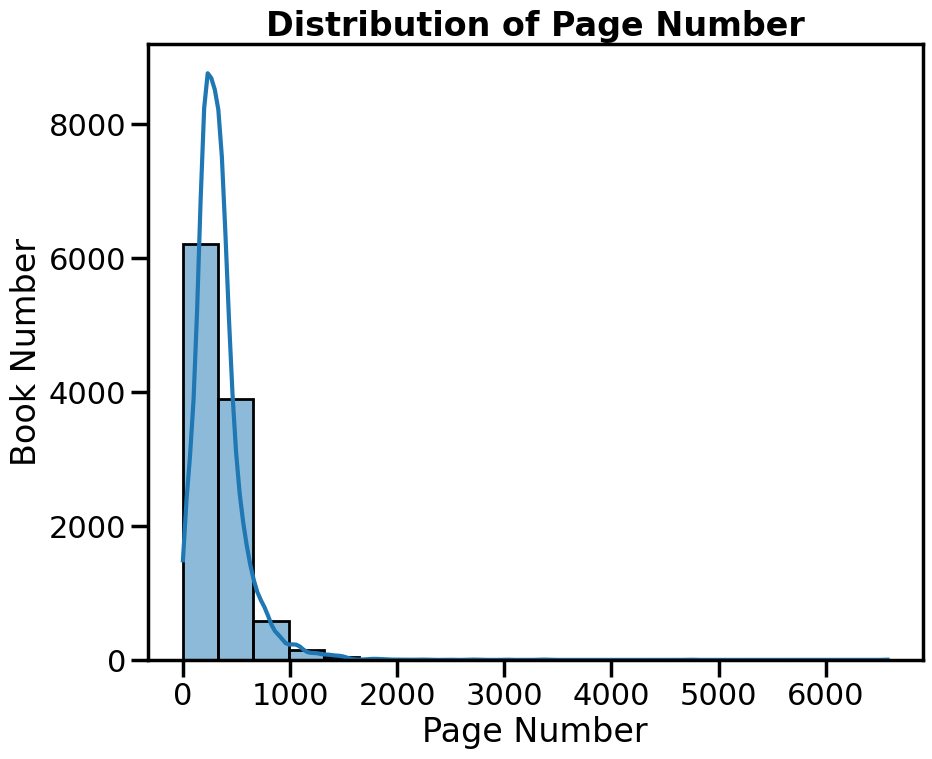

In [ ]:
num_pages = b['num_pages']

plt.figure(figsize=(10,8))
sns.histplot(num_pages, bins=20, kde=True)
plt.title('Distribution of Page Number', fontweight='bold')
plt.xlabel("Page Number")
plt.ylabel("Book Number")
plt.show()

In [ ]:
b['Author'].head()

,Author
0,J.K. ROWLING/MARY GRANDPRÉ
1,J.K. ROWLING/MARY GRANDPRÉ
2,J.K. ROWLING
3,J.K. ROWLING/MARY GRANDPRÉ
4,J.K. ROWLING/MARY GRANDPRÉ


In [ ]:
b['first_author'] = b['Author'].str.split('/').str[0]
b['first_author'].head()

,first_author
0,J.K. ROWLING
1,J.K. ROWLING
2,J.K. ROWLING
3,J.K. ROWLING
4,J.K. ROWLING


In [ ]:
most_book = b.groupby(by=['first_author']).agg({'Title': ['nunique']})
most_book.columns = ['most_book']
most_book.reset_index(inplace=True)
most_book = most_book.sort_values(by=['most_book'], ascending=False)
print(most_book.head(5))

             first_author  most_book
3671         STEPHEN KING         62
2943       P.G. WODEHOUSE         45
4071  WILLIAM SHAKESPEARE         44
1650      JAMES PATTERSON         41
2673      MERCEDES LACKEY         40


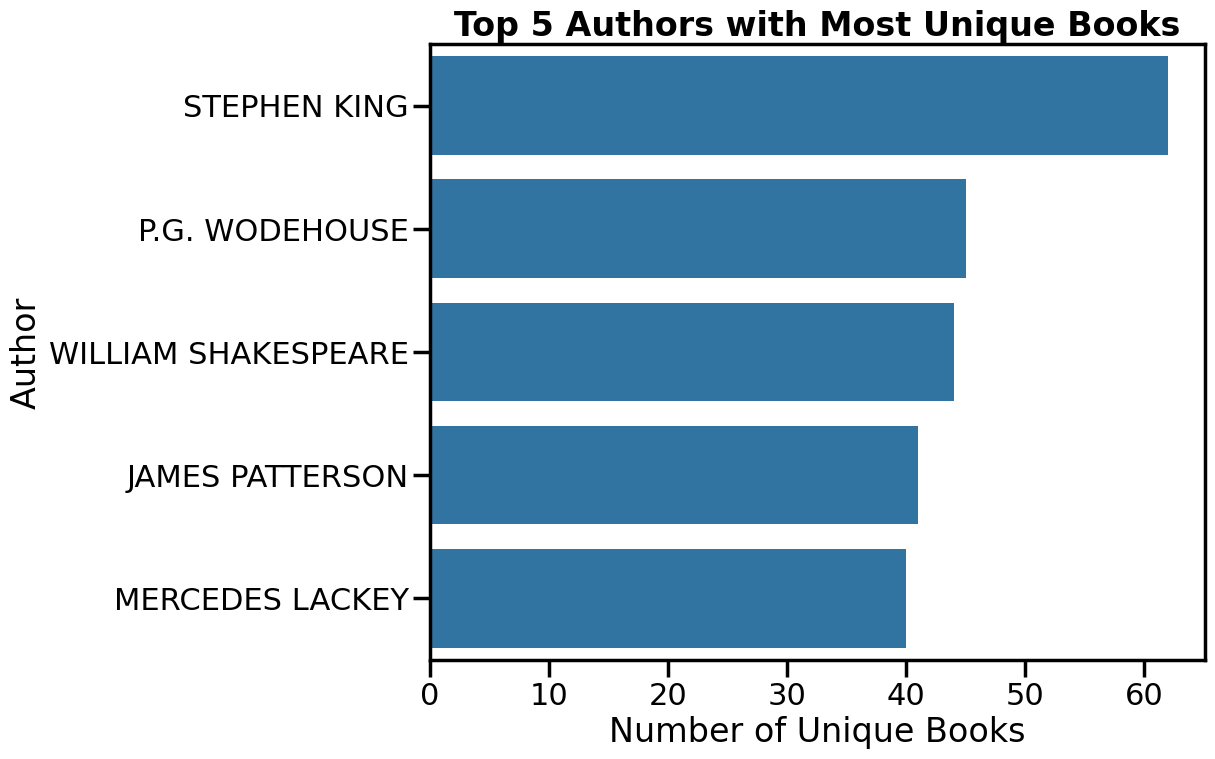

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='most_book', y='first_author', data=most_book.head(5), errorbar=None)
plt.title('Top 5 Authors with Most Unique Books', fontweight='bold')
plt.xlabel('Number of Unique Books')
plt.ylabel('Author')
plt.show()

In [ ]:
#Take an author as example
author_name = 'Stephen Hawking'
author_name=author_name.upper()
# Find the books by the author in the dataset
author_books = b[b['first_author'] == author_name]

# Recommend the top 3 books by the same author based on weighted rating
recommended_books = author_books.sort_values('weighted_rating', ascending=False).head(3)

# Print the recommended books
print("\nRecommended books:")
for _, book in recommended_books.iterrows():
    print(f"{book['Title']} by {book['Author']} with a weighted rating of {book['weighted_rating']}")


Recommended books:
A BRIEFER HISTORY OF TIME by STEPHEN HAWKING/LEONARD MLODINOW with a weighted rating of 4.185247434020459
A BRIEF HISTORY OF TIME by STEPHEN HAWKING with a weighted rating of 4.166781046921022
THE UNIVERSE IN A NUTSHELL by STEPHEN HAWKING with a weighted rating of 4.128423861306379


In [ ]:
# Normalize the features, scale again because above wwe scale filtered book
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors # Import the NearestNeighbors class


scaler = StandardScaler()
features = scaler.fit_transform(b[['weighted_rating', 'num_pages', 'text_reviews_count']])

# Split the data into training and testing sets (80-20 split)
X_train, X_test = train_test_split(features, test_size=0.2, random_state=np.random.randint(100))

# Use KNN to find similar books
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X_train)

# Ask the user for a book name
book_name = "Artesia: Adventures in the Known World"
book_name=book_name.upper()
# Find the book in the dataset
book_index = b[b['Title'] == book_name].index[0]

# Calculate the weighted rating of the book
book_weighted_rating = b.loc[book_index, 'weighted_rating']
print(f"The weighted rating of {book_name} is {book_weighted_rating}")

# Find books similar to the user's book
distances, indices = knn.kneighbors(features[book_index].reshape(1, -1))

# Print the recommended books
print("\nRecommended books:")
print(b.iloc[indices[0]][['Title', 'weighted_rating']])

The weighted rating of ARTESIA: ADVENTURES IN THE KNOWN WORLD is 3.9464308196235685

Recommended books:
                                                  Title  weighted_rating
3014                              EAT RIGHT 4 YOUR TYPE         3.924595
1488  WHAT LOOKS LIKE CRAZY ON AN ORDINARY DAY (IDLE...         3.762369
4651           THE WALL OF THE SKY  THE WALL OF THE EYE         3.875009
399                                       THE HISTORIES         3.945510
6328                   THE ABANDONED (HARROW HOUSE  #4)         3.913005


In [ ]:
!pip install scikit-learn

from sklearn.metrics import average_precision_score
def calculate_map(y_true, y_pred):
    """
    Calculates the Mean Average Precision (MAP) score.
    """
    return average_precision_score(y_true, y_pred)

recommended_books = ["Artesia: Adventures in the Known World"]
relevant_books = ['The Birth of Tragedy', 'World of Warcraft Atlas', 'The Mantle of Kendis-Dai (Starshield  #1)',"On Bullshit","Clouds/Wasps/Birds (Aristophanes 1)"]
# Get all unique books from both recommended and relevant books
all_books = list(set(recommended_books + relevant_books))

# Create y_true and y_pred based on all_books
y_true = [1 if book in relevant_books else 0 for book in all_books]
y_pred = [1 if book in recommended_books else 0 for book in all_books]

# Calculate and print MAP
map_score = calculate_map(y_true, y_pred)
print(f'Mean Average Precision: {map_score}')

Mean Average Precision: 0.8333333333333334


In [ ]:
# Count the genres first
genres_counts = b['genres'].str.split(';').explode().value_counts()

print(genres_counts)

genres
FICTION                           6860
CLASSICS                          3313
NONFICTION                        3097
LITERATURE                        2830
FANTASY                           2530
                                  ... 
MANGA,YURI                           1
ACTIVITIES                           1
FAN FICTION,SLASH FICTION            1
SOCIAL ISSUES,SOCIAL MOVEMENTS       1
HORROR TALES                         1
Name: count, Length: 881, dtype: int64


In [ ]:
# Find popular genres
popular_genres = genres_counts[genres_counts > 2000]
print(popular_genres)

genres
FICTION       6860
CLASSICS      3313
NONFICTION    3097
LITERATURE    2830
FANTASY       2530
NOVELS        2509
Name: count, dtype: int64


In [ ]:
#Method to take author from user
def author(author_name):
  author_books = b[b['first_author'] == author_name]
  if len(author_books)==0:
    print("Author not found!")
  else:
    recommended_books = author_books.sort_values('weighted_rating', ascending=False).head(3)
    print("\nRecommended books:")
    for _, book in recommended_books.iterrows():
      print(f"{book['Title']} by {book['Author']}")# with a weighted rating of {book['weighted_rating']}")

In [ ]:
#Method to take book from user
def bookname(book_name):
  matching_rows = b[b['Title'] == book_name]
  if not matching_rows.empty:
    book_index = matching_rows.index[0]
    #book_index = b[b['Title'] == book_name].index[0]
    book_weighted_rating = b.loc[book_index, 'weighted_rating']
    #print(f"The weighted rating of {book_name} is {book_weighted_rating}")

    distances, indices = knn.kneighbors(features[book_index].reshape(1, -1))
    print("\nRecommended books:")
    recommended_books = b.iloc[indices[0]]
    recommended_books = recommended_books[recommended_books['Title'] != book_name]
    # Display title and author of the recommended books
    for _, row in recommended_books.iterrows():
      print(f"Title: {row['Title']}, Author: {row['Author']}")  #, Weighted Rating: {row['weighted_rating']}")
  else:
    book_index = None
    print("Book not found!")

In [ ]:
# Function to find books by genre
def find_books_by_genre(genre_given, c):
    for genre in genre_given:
      print(f"Books in the '{genre}' genre:")

        # Find books that match the genre
      books_in_genre = [i for i in b.index if genre in b['genres'][i]]

      if books_in_genre:
            # Extract titles and ratings for books in this genre
          books = [(b['Title'][i], b['Author'][i], b['weighted_rating'][i]) for i in books_in_genre]

            # Separate titles and ratings for weighted random selection
          titles = [book[0] for book in books]
          authors = [book[1] for book in books]
          ratings = [book[2] for book in books]

            # Normalize ratings to create probabilities
          rating_sum = sum(ratings)
          probabilities = [rating / rating_sum for rating in ratings]  # This gives probabilities based on weighted ratings

            # Randomly sample up to 'c' books based on their weighted ratings
          sampled_books = np.random.choice(titles, size=min(c, len(titles)), replace=False, p=probabilities)

            # Print the selected books
          for book in sampled_books:
            index = titles.index(book)
            author = authors[index]
            print(f"- {book} by {author}")
      else:
          print("No books found in this genre.")

      print()

In [ ]:
def is_int_convertible(user_input):
    try:
        int(user_input)
        return True
    except ValueError:
        return False
print("Welcome to our Book Recommendation System!\n")
print("Choose 1 to input author, 2 to input book, 3 to input genre, 4 to exit")
while True:
  choice=input("Enter your choice: ")
  if is_int_convertible(choice)==False:
    print("Enter integers!")
    choice=input("Enter your choice: ")
  else:
    n=int(choice)
    if(n==1):
      t=input("Enter author name: ")
      t=t.upper()
      author(t)
    elif(n==2):
      t=input("Enter book name: ")
      t=t.upper()
      bookname(t)
    elif(n==3):
      c=input("Enter number of recommendations: ")
      c=int(c)
      n = int(input("Enter the number of genres: "))
      # Collect genres from the user
      genre_given = []
      for _ in range(n):
        genre = input("Enter a genre: ").strip().upper()
        genre_given.append(genre)
      # Call the function to find and print books for the entered genres
      find_books_by_genre(genre_given, c)
    elif(n==4):
      break;
    else:
      print("Wrong choice! Try again!")




Welcome to our Book Recommendation System!

Choose 1 to input author, 2 to input book, 3 to input genre, 4 to exit
Enter your choice: 4
